In [1]:
# General Tools
import numpy as np
import scipy as sp
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import os
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

#network analysis
import plotly.graph_objects as go
import networkx as nx

#NLP Tools
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, WordNetLemmatizer
from nltk.probability import FreqDist
from textblob import TextBlob
from gensim.corpora import Dictionary
from gensim import matutils, models
import scipy.sparse
import spacy
from spacy import displacy
from collections import Counter
nlp = spacy.load('en_core_web_sm')
%matplotlib inline
plt.close('all')

# SK Learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif


#pre-processing of text
import string
import re
import requests

#seaborn
import seaborn as sns
import matplotlib.pyplot as plt
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

#BERT
!pip install transformers==3
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict
from textwrap import wrap

     |████████████████████████████████| 754 kB 8.6 MB/s 
     |████████████████████████████████| 895 kB 35.5 MB/s 
     |████████████████████████████████| 3.0 MB 49.6 MB/s 
     |████████████████████████████████| 1.2 MB 52.8 MB/s 


In [2]:
%%capture
if not os.path.exists('reviews.zip'):
    !wget 'https://github.com/EladSe17/EladsFinalDSProject/raw/main/reviews.zip'
if not os.path.exists('reviews.csv'):
    !unzip reviews.zip

In [3]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 34.6 MB 3.3 MB/s
     |████████████████████████████████| 10.1 MB 10.0 MB/s 
     |████████████████████████████████| 596 kB 56.2 MB/s 
     |████████████████████████████████| 102 kB 12.6 MB/s 
     |████████████████████████████████| 675 kB 48.2 MB/s 
     |████████████████████████████████| 4.7 MB 47.9 MB/s 
     |████████████████████████████████| 62 kB 934 kB/s 
     |████████████████████████████████| 812 kB 64.0 MB/s 
     |████████████████████████████████| 28.5 MB 1.5 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261261 sha256=502db9cb509af3ed39647265807762fff07320bfbcbc5a4f7043b0601173c07c
  Stored in directory: /tmp/pip-ephem-wheel-cache-yhn_h13i/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=bae0e43736d4411a7d57ec261075857a6772914d6f4ae6506d5ff87917f19f69
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b1

In [4]:
data = pd.read_csv("reviews.csv")
data.shape

(28332, 24)

In [5]:
df=data

# EDA

In [6]:
df.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [8]:
df.isna().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           0
sourceURLs                 0
dtype: int64

In [9]:
!pip install --user -U pandas-profiling

In [10]:
!pip install --user -U networkx

In [11]:
from pandas_profiling.version import __version__
print(__version__)

3.1.1


In [12]:
#Reviews bar
rating_rate = df['reviews.rating'].value_counts()/len(df)

In [13]:
rating_rate.plot.bar() 

In [14]:
#Primary categories rates
PCat_rate = df['primaryCategories'].value_counts()/len(df)

In [15]:
PCat_rate.plot.bar()

In [16]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Pre-Processing + Data Cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [18]:
#Drop null values
df.dropna(subset=['reviews.username', 'reviews.title', 'reviews.text','reviews.rating'])
df.isna().sum()
df.shape

(28332, 24)

In [19]:
df['reviews_text'] = df['reviews.text'] 
df['reviews_rating'] = df['reviews.rating'] 

In [20]:
# WC1 - by category
stopwords = set(STOPWORDS)

# generate word cloud and show it
for x in df.primaryCategories.unique():
	wc1 = WordCloud(background_color="white", max_words=2000, stopwords=stopwords,
                   max_font_size=40, random_state=42)
	wc1.generate(df.reviews_text[(df.reviews_text.notnull()) & (df.primaryCategories == x)].to_string())
	plt.imshow(wc1)
	plt.title(x)
	plt.axis("off")
	plt.show()

In [21]:
# WC2 - by rating
stopwords = set(STOPWORDS)

# generate word cloud and show it
for x in df.reviews_rating.unique():
	wc2 = WordCloud(background_color="white", max_words=2000, stopwords=stopwords,
                   max_font_size=40, random_state=42)
	wc2.generate(df.reviews_text[(df.reviews_text.notnull()) & (df.reviews_rating == x)].to_string())
	plt.imshow(wc2)
	plt.title(x)
	plt.axis("off")
	plt.show()

In [22]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,reviews_text,reviews_rating
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",I order 3 of them and one of the item is bad q...,3
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",Bulk is always the less expensive way to go fo...,4
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",Well they are not Duracell but for the price i...,5
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",Seem to work as well as name brand batteries a...,5
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",These batteries are very long lasting the pric...,5


In [23]:
#הסרה של 4 עמודות שיש בהם אחוז גבוה של תאים ריקים
df.drop(['reviews.didPurchase', 'reviews.id', 'reviews.numHelpful'], axis = 1, inplace = True)

In [24]:
df.shape

(28332, 23)

#Feture Engineering

In [25]:
#ספירת מילים וספירת תווים לפי ביקורת
df['rev_len'] = df['reviews.text'].map(lambda x: len(x))
df['rev_n_words'] = df['reviews.text'].str.findall(r'(\w+)').str.len()
fig, ax = plt.subplots(figsize=(5,4))
df.rev_len.plot(kind='hist',color='grey',edgecolor="k");
df.rev_n_words.plot(kind='hist',color='g',edgecolor="k", alpha=0.9);
plt.axvline(df['rev_len'].median(), ls = '--',color='r',lw=4);
plt.axvline(df['rev_n_words'].median(), ls = '--',color='r',lw=4);
textstr = (f"median characters in a review: {round(df['rev_len'].median())} \n"
           f"median words in a review: {round(df['rev_n_words'].median())}")  
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5,edgecolor='black')
plt.text(0.65, 0.95, textstr, fontsize=14,transform=ax.transAxes,verticalalignment='top', bbox=props)
plt.title("The distribution of words and characters in all reviews", pad=10);plt.margins(x=0);

In [26]:
#הורדת שורות עם ביקורת של 0 מילים
df = df[df['rev_n_words']>0]
df.shape

(28329, 25)

In [27]:
#חלוקת הדאטה ל10 קבוצות שוות של מספר שורות
df['qcut_word_count_group'] = pd.qcut(df['rev_n_words'], q=10, precision=0)
df.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,reviews_text,reviews_rating,rev_len,rev_n_words,qcut_word_count_group
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",I order 3 of them and one of the item is bad q...,3,139,31,"(27.0, 37.0]"
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",Bulk is always the less expensive way to go fo...,4,67,13,"(11.0, 14.0]"
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",Well they are not Duracell but for the price i...,5,56,12,"(11.0, 14.0]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",Seem to work as well as name brand batteries a...,5,67,14,"(11.0, 14.0]"
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",These batteries are very long lasting the pric...,5,57,10,"(9.0, 11.0]"


In [28]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
new = df.groupby(['qcut_word_count_group']).id.count().reset_index()
g=sns.barplot(x="qcut_word_count_group", y="id", data=new)
show_values_on_bars(g, "v")

In [29]:
#חלוקת הדאטה לקבוצות ל10 שוות של ערכי טווחים
df['cut_word_count_group'] = pd.cut(df['rev_n_words'], 10)
df.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,reviews_text,reviews_rating,rev_len,rev_n_words,qcut_word_count_group,cut_word_count_group
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",I order 3 of them and one of the item is bad q...,3,139,31,"(27.0, 37.0]","(-0.61, 162.0]"
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",Bulk is always the less expensive way to go fo...,4,67,13,"(11.0, 14.0]","(-0.61, 162.0]"
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",Well they are not Duracell but for the price i...,5,56,12,"(11.0, 14.0]","(-0.61, 162.0]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",Seem to work as well as name brand batteries a...,5,67,14,"(11.0, 14.0]","(-0.61, 162.0]"
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",These batteries are very long lasting the pric...,5,57,10,"(9.0, 11.0]","(-0.61, 162.0]"


In [30]:
df.shape

(28329, 27)

In [31]:
#ממוצע מילים של ביקורות לפי קטגוריה ראשית של מוצרים
sns.set(rc={'figure.figsize':(25.7,8.27)})
new = df.groupby('primaryCategories')['rev_n_words'].mean().reset_index()
g=sns.barplot(x="primaryCategories", y="rev_n_words", data=new)
show_values_on_bars(g, "v")

In [32]:
#חציון מילים של ביקורות לפי קטגוריה ראשית של מוצרים
sns.set(rc={'figure.figsize':(25.7,8.27)})
new = df.groupby('primaryCategories')['rev_n_words'].median().reset_index()
g=sns.barplot(x="primaryCategories", y="rev_n_words", data=new)
show_values_on_bars(g, "v")

In [33]:
#מספר מילים בביקורת מול ציון שניתן למוצר
new=df[['rev_n_words', 'reviews.rating']]
sns.violinplot(x='reviews.rating', y='rev_n_words', data=new)

ניתן לראות מגמה שככל שהציון יותר גבוה בממוצע מספר המילים מתקצר

In [34]:
new=df[['rev_n_words', 'reviews.rating', 'primaryCategories', 'manufacturer']]
new.dtypes

rev_n_words           int64
reviews.rating        int64
primaryCategories    object
manufacturer         object
dtype: object

# Feature Selection

Classifier with LinearSVC and TFIDF vectorizer

In [35]:
#Vectorizing and Splitting reviews and ratings
df = data
df = df[df['reviews.rating'].notnull() & df['reviews.text'].notnull()]
df.isnull().sum()
df = df[['reviews.text', 'reviews.rating']]
df.columns = ['review_text', 'review_rating']
df.shape

(28332, 2)

In [36]:
def clean_text(review_text):
   
    review_text = str(review_text).lower() # convert to lowercase
    review_text = re.sub('\[.*?\]', '', review_text) 
    review_text = re.sub('https?://\S+|www\.\S+', '', review_text) # Remove URls
    review_text = re.sub('<.*?>+', '', review_text)
    review_text = re.sub(r'[^a-z0-9\s]', '', review_text) # Remove punctuation
    review_text = re.sub('\n', '', review_text)
    review_text = re.sub('\w*\d\w*', '', review_text)
    return review_text

In [37]:
df['Clean_review'] = df['review_text'].apply(clean_text)

In [38]:
X = df['Clean_review']
y = df['review_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
X.shape, y.shape

((28332,), (28332,))

In [40]:
df.sample(3)

,review_text,review_rating,Clean_review
14140,"Fine for reading, ...haven't used it for anyth...",3,fine for reading havent used it for anything e...
27490,Fun to use and also easy for kids to use as we...,5,fun to use and also easy for kids to use as we...
20856,If you‚Äôre on a budget or media consumption i...,4,if youre on a budget or media consumption is y...


In [41]:
#Vectorizer-tfidf
vectorizer = TfidfVectorizer(use_idf=True)
X_train_tfidf = vectorizer.fit_transform(X_train) 
X_train_tfidf.shape

(18982, 10496)

Linear SVC Classifier

In [42]:
#Classifier 1
clf1 = LinearSVC()

In [43]:
#Creating the pipeline for vectorizing and classifing
text_clf_SVC = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3), stop_words='english', use_idf=True)),
                     ('clf1', LinearSVC())])

# Feed the training data through the pipeline
text_clf_SVC.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf1',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
         

In [44]:
predictions1 = text_clf_SVC.predict(X_test)

In [45]:
SVC_predictions = text_clf_SVC.predict(X)

In [46]:
# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions1))

[[ 203    7   10   19   73]
 [  49   75   22   15   52]
 [  15    8  189   55  128]
 [  13    3   11 1074  779]
 [  20    3   12  185 6330]]


In [47]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions1))

0.8418181818181818


In [48]:
# Print a classification report
print(metrics.classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           1       0.68      0.65      0.66       312
           2       0.78      0.35      0.49       213
           3       0.77      0.48      0.59       395
           4       0.80      0.57      0.67      1880
           5       0.86      0.97      0.91      6550

    accuracy                           0.84      9350
   macro avg       0.78      0.60      0.66      9350
weighted avg       0.84      0.84      0.83      9350



In [49]:
df['LinearSVC_predict'] = SVC_predictions
print(f'Linear SVC score: {metrics.accuracy_score(y_test,predictions1)}')

Linear SVC score: 0.8418181818181818


In [50]:
LinearSVC_df = df
LinearSVC_df.sample(5)

,review_text,review_rating,Clean_review,LinearSVC_predict
26002,Great tablet for on the go. Good size screen t...,5,great tablet for on the go good size screen to...,5
15211,Bought this for my four year old nephew and he...,4,bought this for my four year old nephew and he...,5
27405,The Fire HD8 tablet is so easy and fun to use....,5,the fire tablet is so easy and fun to use tak...,5
21169,I got this tablet so I wouldn't have to pack u...,4,i got this tablet so i wouldnt have to pack up...,4
15015,My child loves playing with the Kindle fire. I...,5,my child loves playing with the kindle fire it...,5


In [51]:
 from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import  XGBClassifier

GradientBoostingClassifier

In [52]:
#Classifier 2
clf2 = GradientBoostingClassifier(n_estimators=150, learning_rate=0.4,max_depth=10, random_state=17)

In [53]:
#Creating the pipeline for vectorizing and classifing
text_clf_GBC = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3), stop_words='english', use_idf=True)),
                     ('clf2', GradientBoostingClassifier(n_estimators=150, learning_rate=0.4,max_depth=10, random_state=17))])

# Feed the training data through the pipeline
text_clf_GBC.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                            learning_rate=0.4, loss='deviance',
                                            max_depth=10, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
         

In [54]:
#GBC
predictions2 = text_clf_GBC.predict(X_test)

In [55]:
# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions2))

[[ 173   18   12   21   88]
 [  27   95   20   24   47]
 [  22   12  200   54  107]
 [  15   12   50 1108  695]
 [  65   53   71  405 5956]]


In [56]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions2))

0.8055614973262032


In [57]:
# Print a classification report
print(metrics.classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           1       0.57      0.55      0.56       312
           2       0.50      0.45      0.47       213
           3       0.57      0.51      0.53       395
           4       0.69      0.59      0.63      1880
           5       0.86      0.91      0.89      6550

    accuracy                           0.81      9350
   macro avg       0.64      0.60      0.62      9350
weighted avg       0.80      0.81      0.80      9350



In [58]:
GBC_predictions = text_clf_GBC.predict(X)
#Adding GBC predictions to df
GBC_df = df
GBC_df['GBC_predict'] = GBC_predictions
print(f'GradientBoosting Classifier score: {metrics.accuracy_score(y_test,predictions2)}')

GradientBoosting Classifier score: 0.8055614973262032


In [59]:
#GBC DF
GBC_df.sample(5)

,review_text,review_rating,Clean_review,LinearSVC_predict,GBC_predict
24149,I was impressed with the overall of this Kindl...,4,i was impressed with the overall of this kindl...,4,5
19201,Very happy with my purchase!! I bought this fo...,5,very happy with my purchase i bought this for ...,5,5
16744,I got 2 of this for kids 5 and 3 it is a prett...,3,i got of this for kids and it is a pretty g...,3,3
27471,Picture is great. Quick response when going fr...,4,picture is great quick response when going fro...,4,4
1656,"Excellent value, and the batteries last just a...",5,excellent value and the batteries last just as...,5,5


XGBoost

In [60]:
#Classifier 3
xgb = XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=100, silent=True,booster='gbtree')

In [61]:
#Creating the pipeline for vectorizing and classifing
text_clf_XGB = Pipeline([('tfidf', TfidfVectorizer(use_idf=True)),
                     ('clf3', XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=100, silent=True,booster='gbtree'))])

# Feed the training data through the pipeline
text_clf_XGB.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=2,
                        

In [62]:
#GBC
predictions3 = text_clf_XGB.predict(X_test)

In [63]:
# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions3))

[[  35    0    0   13  264]
 [  11    3    2   14  183]
 [   1    1    9   50  334]
 [   1    0    3  214 1662]
 [   2    0    2   63 6483]]


In [64]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions3))

0.7212834224598931


In [65]:
# Print a classification report
print(metrics.classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           1       0.70      0.11      0.19       312
           2       0.75      0.01      0.03       213
           3       0.56      0.02      0.04       395
           4       0.60      0.11      0.19      1880
           5       0.73      0.99      0.84      6550

    accuracy                           0.72      9350
   macro avg       0.67      0.25      0.26      9350
weighted avg       0.69      0.72      0.63      9350



In [66]:
XGB_predictions = text_clf_XGB.predict(X)
#Adding GBC predictions to df
XGB_df = df
XGB_df['XGB_predict'] = XGB_predictions
print(f'XGB Classifier score: {metrics.accuracy_score(y_test,predictions3)}')

XGB Classifier score: 0.7212834224598931


In [67]:
#XGB DF
XGB_df.sample(5)

,review_text,review_rating,Clean_review,LinearSVC_predict,GBC_predict,XGB_predict
2190,Great batteries in bulk for cheap,5,great batteries in bulk for cheap,5,5,5
7018,I ordered a 20 pack of AA batteries from amazo...,5,i ordered a pack of aa batteries from amazon ...,5,5,5
21745,The Amazon Fire tablet is a great starter tabl...,4,the amazon fire tablet is a great starter tabl...,4,4,5
18269,This is a great tablet for basic needs.. inter...,4,this is a great tablet for basic needs interne...,4,4,5
7013,batteries are batteries. Seemed like a good price,5,batteries are batteries seemed like a good price,5,5,5


Summery of the models

In [68]:
summery_df = pd.merge(df, data, left_index=True, right_index=True)
summery_df = summery_df[['id','dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
                         'primaryCategories', 'manufacturer', 'manufacturerNumber', 'reviews.date', 'reviews.dateSeen', 
                         'reviews.sourceURLs', 'reviews.title', 'reviews.username','reviews_text', 'rev_len',
                          'rev_n_words', 'LinearSVC_predict', 'GBC_predict','XGB_predict', 'reviews_rating']]
summery_df['hard_and_soft_votingclassifier_predict'] = np.select(
    [
        summery_df['LinearSVC_predict']==summery_df['GBC_predict'], 
        summery_df['LinearSVC_predict']==summery_df['XGB_predict'],
        summery_df['GBC_predict']==summery_df['XGB_predict']
    ], 
    [
        summery_df['LinearSVC_predict'], 
        summery_df['XGB_predict'],
        summery_df['GBC_predict']
    ], 
    default=((summery_df['LinearSVC_predict']+summery_df['XGB_predict']+summery_df['GBC_predict'])/3).round(0).astype(int)
)
summery_df.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,primaryCategories,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.sourceURLs,reviews.title,reviews.username,reviews_text,rev_len,rev_n_words,LinearSVC_predict,GBC_predict,XGB_predict,reviews_rating,hard_and_soft_votingclassifier_predict
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,https://www.amazon.com/product-reviews/B00QWO9...,... 3 of them and one of the item is bad quali...,Byger yang,I order 3 of them and one of the item is bad q...,139,31,3,3,5,3,3
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,https://www.amazon.com/product-reviews/B00QWO9...,... always the less expensive way to go for pr...,ByMG,Bulk is always the less expensive way to go fo...,67,13,4,4,5,4,4
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,https://www.amazon.com/product-reviews/B00QWO9...,... are not Duracell but for the price i am ha...,BySharon Lambert,Well they are not Duracell but for the price i...,56,12,5,5,5,5,5
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,https://www.amazon.com/product-reviews/B00QWO9...,... as well as name brand batteries at a much ...,Bymark sexson,Seem to work as well as name brand batteries a...,67,14,5,5,5,5,5
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,https://www.amazon.com/product-reviews/B00QWO9...,... batteries are very long lasting the price ...,Bylinda,These batteries are very long lasting the pric...,57,10,5,5,5,5,5


In [69]:
summery_df = summery_df[['id','dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
                         'primaryCategories', 'manufacturer', 'manufacturerNumber', 'reviews.date', 'reviews.dateSeen', 
                         'reviews.sourceURLs', 'reviews.title', 'reviews.username','reviews_text', 'rev_len',
                          'rev_n_words', 'hard_and_soft_votingclassifier_predict' , 'reviews_rating']]
summery_df['predict_and_real_rating_gap'] = (summery_df['hard_and_soft_votingclassifier_predict']-summery_df['reviews_rating']).abs()
summery_df.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,primaryCategories,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.sourceURLs,reviews.title,reviews.username,reviews_text,rev_len,rev_n_words,hard_and_soft_votingclassifier_predict,reviews_rating,predict_and_real_rating_gap
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,https://www.amazon.com/product-reviews/B00QWO9...,... 3 of them and one of the item is bad quali...,Byger yang,I order 3 of them and one of the item is bad q...,139,31,3,3,0
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,https://www.amazon.com/product-reviews/B00QWO9...,... always the less expensive way to go for pr...,ByMG,Bulk is always the less expensive way to go fo...,67,13,4,4,0
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,https://www.amazon.com/product-reviews/B00QWO9...,... are not Duracell but for the price i am ha...,BySharon Lambert,Well they are not Duracell but for the price i...,56,12,5,5,0


In [70]:
users_summery_df=pd.DataFrame(summery_df.groupby('reviews.username')['predict_and_real_rating_gap'].mean()).round(0).astype(int)

In [71]:
#sns.countplot(users_summery_df['Predict_And_Real_Rating_gap'])
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(users_summery_df['predict_and_real_rating_gap'])
graph.set_xticklabels(graph.get_xticklabels())
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 6,
        users_summery_df['predict_and_real_rating_gap'].value_counts()[i],ha="center")
    i += 1

In [72]:
users_summery_df['user_authenticity_score'] = (5-users_summery_df['predict_and_real_rating_gap'])/5

In [73]:
summery_df = pd.merge(summery_df, users_summery_df, on=['reviews.username'])
summery_df = summery_df.drop(columns=['predict_and_real_rating_gap_y'])
summery_df = summery_df.rename({'predict_and_real_rating_gap_x': 'predict_and_real_rating_gap'} , axis=1)
summery_df.sample(3)

,id,dateAdded,dateUpdated,name,asins,brand,primaryCategories,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.sourceURLs,reviews.title,reviews.username,reviews_text,rev_len,rev_n_words,hard_and_soft_votingclassifier_predict,reviews_rating,predict_and_real_rating_gap,user_authenticity_score
23663,AVzYlGnuGV-KLJ3abPUD,2017-06-24T05:30:24Z,2019-03-09T02:01:08Z,"All-New Fire 7 Tablet with Alexa, 7"" Display, ...",B01IO618J8,Amazon,Electronics,Amazon,B01IO618J8,2017-07-22T00:00:00.000Z,"2017-09-04T00:00:00Z,2018-05-28T00:00:00Z,2017...",https://reviews.bestbuy.com/3545/5871233/revie...,Best kindle yet,Mandy,Easy to download needed apps and programs. Ale...,114,19,5,5,0,1.0
20133,AVqVGWLKnnc1JgDc3jF1,2017-03-03T16:55:53Z,2019-02-25T02:03:34Z,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,Electronics,Amazon,53-004683,2017-01-23T00:00:00.000Z,"2017-06-04T00:00:00Z,2017-06-03T00:00:00Z",http://reviews.bestbuy.com/3545/5026300/review...,Great Tablet for Kids,silverbullet64,Great generic tablet for looking to keep kids ...,254,47,4,4,0,1.0
22992,AVqVGWLKnnc1JgDc3jF1,2017-03-03T16:55:53Z,2019-02-25T02:03:34Z,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,Electronics,Amazon,53-004683,2017-03-25T00:00:00.000Z,"2017-06-03T00:00:00Z,2017-06-04T00:00:00Z",http://reviews.bestbuy.com/3545/5026300/review...,Tablet for my 8 year old,Kelso,Its a decent tablet for a really good price. i...,316,66,4,4,0,1.0


# Using BERT

In [74]:
!pip install transformers==3
!pip install tokenizers==0.9.4
!pip install simpletransformers

     |████████████████████████████████| 2.9 MB 7.0 MB/s 
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.8.0rc4
    Uninstalling tokenizers-0.8.0rc4:
      Successfully uninstalled tokenizers-0.8.0rc4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 3.0.0 requires tokenizers==0.8.0-rc4, but you have tokenizers 0.9.4 which is incompatible.


     |████████████████████████████████| 231 kB 6.6 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 2.9 MB 56.8 MB/s 
     |████████████████████████████████| 8.3 MB 11.3 MB/s 
     |████████████████████████████████| 287 kB 63.2 MB/s 
     |████████████████████████████████| 1.7 MB 54.8 MB/s 
     |████████████████████████████████| 3.3 MB 37.5 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 97 kB 6.4 MB/s 
     |████████████████████████████████| 180 kB 49.4 MB/s 
     |████████████████████████████████| 139 kB 49.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 1.3 MB 54.5 MB/s 
     |████████████████████████████████| 243 kB 53.6 MB/s 
     |████████████████████████████████| 125 kB 64.5 MB/s 
     |████████████████████████████████| 160 kB 63.2 MB/s 
     |████████████████████████████████| 271 kB 68.5 MB/s 
     |█████████████████

In [75]:
!pip install -q -U watermark
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.4.1 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.28.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
Python implementation: CPython
Python version       : 3.7.12
IPython version      : 5.5.0

numpy       : 1.19.5
pandas      : 1.1.5
torch       : 1.9.0+cu111
transformers: 4.11.3



In [76]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from collections import defaultdict
from textwrap import wrap

import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [77]:
device

device(type='cuda', index=0)

In [78]:
!export CUDA_LAUNCH_BLOCKING=1

In [79]:
df.shape

(28332, 6)

In [80]:
df_BERT = df[['review_text', 'review_rating']]
df_BERT.columns = ['review_text', 'review_rating']
df_BERT.shape

(28332, 2)

In [81]:
def from_zero(rating):
    """ Convert rating into sentiment"""
    if rating == 5:
        rating = 4
    elif rating == 4:
        rating = 3
    elif rating == 3:
        rating = 2
    elif rating == 2:
        rating = 1
    else:
        rating = 0
    return rating

In [82]:
df_BERT['review_rating'] = df['review_rating'].apply(from_zero)

Text(0.5, 0, 'Rating Count')

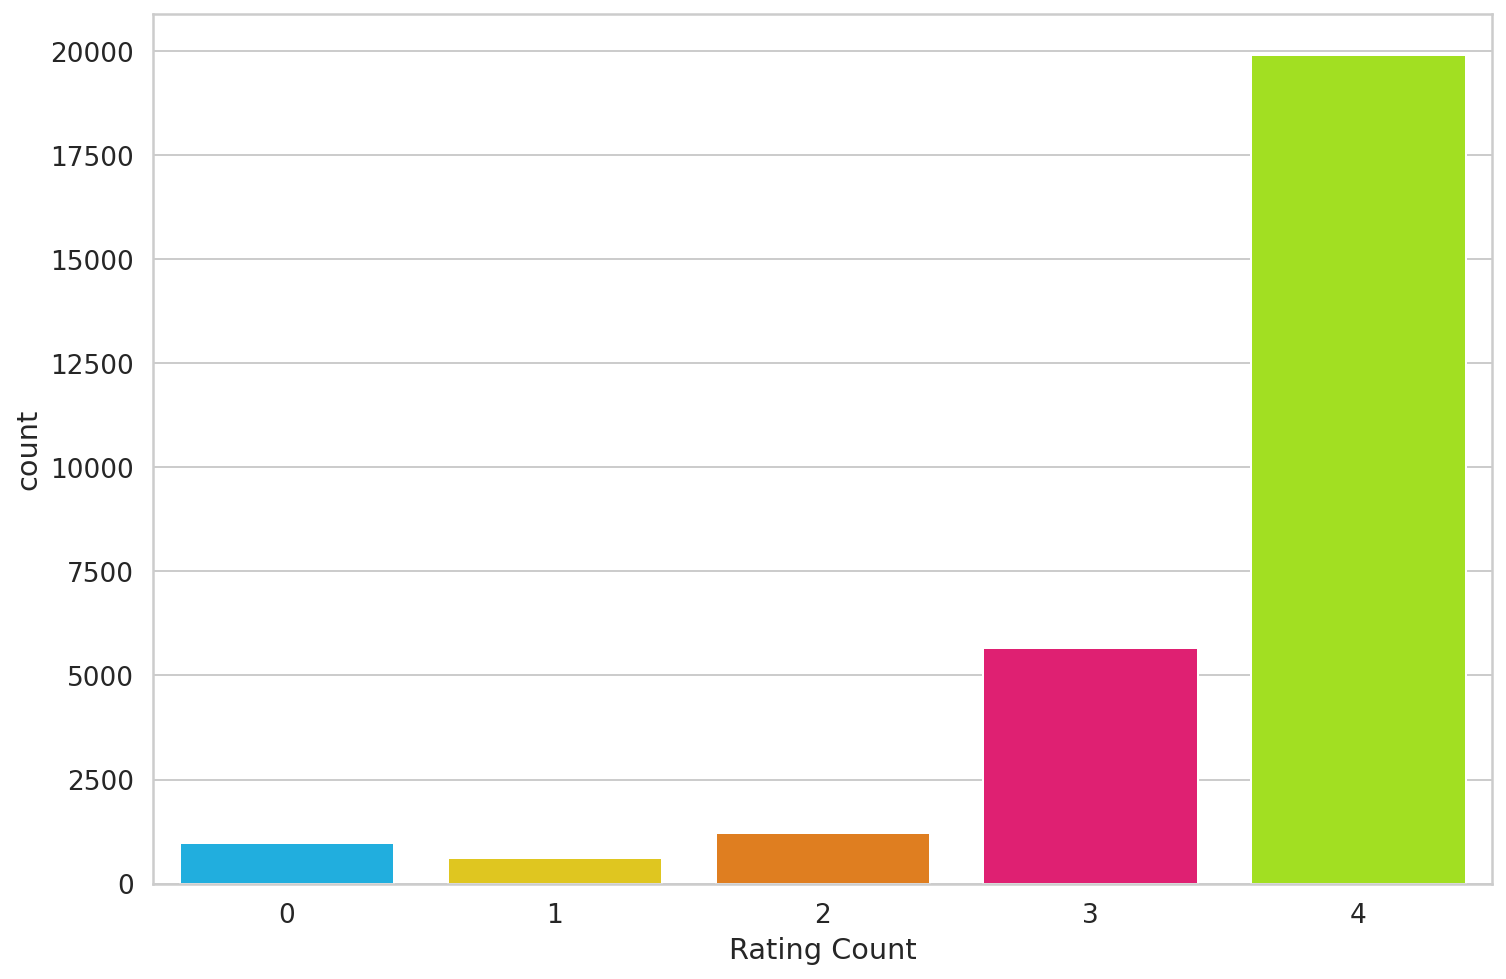

In [83]:
sns.countplot(df_BERT['review_rating'])
plt.xlabel('Rating Count')

In [84]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [85]:
token_lens = []

for txt in df_BERT.review_text:
    tokens = tokenizer.encode(txt,truncation=True, max_length=512)
    token_lens.append(len(tokens))

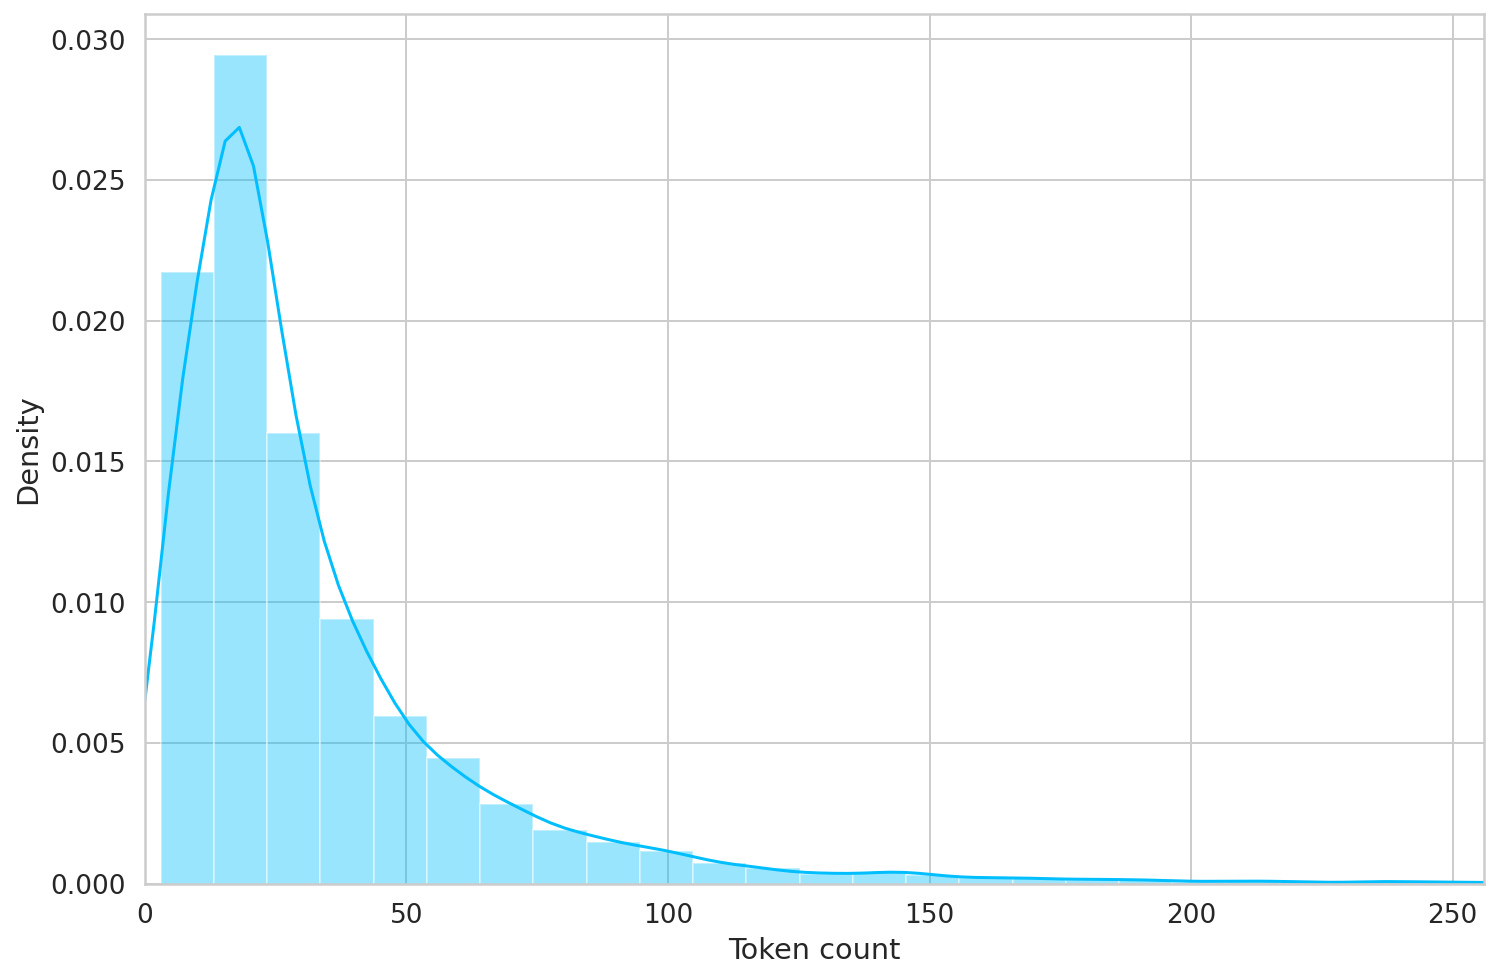

In [86]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

PyTorch Dataset Creator

In [87]:
MAX_LEN = 160
class ReviewsDataset(Dataset):
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    

    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        encoding = self.tokenizer.encode_plus(
          review,
          add_special_tokens=True,
          max_length=self.max_len,
          truncation=True,
          return_token_type_ids=False,
          pad_to_max_length=True,
          return_attention_mask=True,
          return_tensors='pt'
    )
        return {
          'review_text': review,
          'input_ids': encoding['input_ids'].flatten(),
          'attention_mask': encoding['attention_mask'].flatten(),
          'targets': torch.tensor(target, dtype=torch.long)
        }

In [88]:
df_train, df_test = train_test_split(df_BERT, test_size=0.33, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [89]:
df_train.shape, df_val.shape, df_test.shape

((18982, 2), (4675, 2), (4675, 2))

In [90]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = ReviewsDataset(
    reviews=df_BERT.review_text.to_numpy(),
    targets=df_BERT.review_rating.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

    return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
    )

In [91]:
BATCH_SIZE = 32

all_data_loader = create_data_loader(X, tokenizer, MAX_LEN, BATCH_SIZE)
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [92]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [93]:
class RatingClassifier(nn.Module):

    def __init__(self, n_classes):
        super(RatingClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask
    )
        output = self.drop(pooled_output)
        return self.out(output)

In [94]:
df.head()

,review_text,review_rating,Clean_review,LinearSVC_predict,GBC_predict,XGB_predict
0,I order 3 of them and one of the item is bad q...,3,i order of them and one of the item is bad qu...,3,3,5
1,Bulk is always the less expensive way to go fo...,4,bulk is always the less expensive way to go fo...,4,4,5
2,Well they are not Duracell but for the price i...,5,well they are not duracell but for the price i...,5,5,5
3,Seem to work as well as name brand batteries a...,5,seem to work as well as name brand batteries a...,5,5,5
4,These batteries are very long lasting the pric...,5,these batteries are very long lasting the pric...,5,5,5


In [95]:
review_rating = 5

In [96]:
model = RatingClassifier(review_rating)
model = model.to(device)

In [97]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.NLLLoss().to(device)

In [98]:
#Helper Function
def train_epoch(
      model,
      data_loader,
      loss_fn,
      optimizer,
      device,
      scheduler,
      n_examples
    ):
    
    model = model.train()
    losses = []
    correct_predictions = 0
    for d in data_loader:   
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        outputs = model(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
    
    return correct_predictions.double() / n_examples, np.mean(losses)

In [99]:
#Evaluation Function for given loader
def eval_model(model, data_loader, loss_fn, device, n_examples):
    
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:        
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
              )
            _, preds = torch.max(outputs, dim=1)

            loss = loss_fn(outputs, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

In [100]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [101]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    

    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

    print(f'Train loss {train_loss}')

    val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/4
----------
Train loss -0.2666442096233368
Val   loss -0.6079395697515197 accuracy 4.23379679144385

Epoch 2/4
----------
Train loss -0.585983157157898
Val   loss -0.825202668642806 accuracy 4.149304812834225

Epoch 3/4
----------
Train loss -0.9945912957191467
Val   loss -1.03286642915071 accuracy 4.157860962566844

Epoch 4/4
----------
Train loss -1.1591262817382812
Val   loss -1.1954621247249249 accuracy 3.7565775401069517

CPU times: user 19min 30s, sys: 8.07 s, total: 19min 38s
Wall time: 19min 36s


Text(0.5, 1.0, 'Training history')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

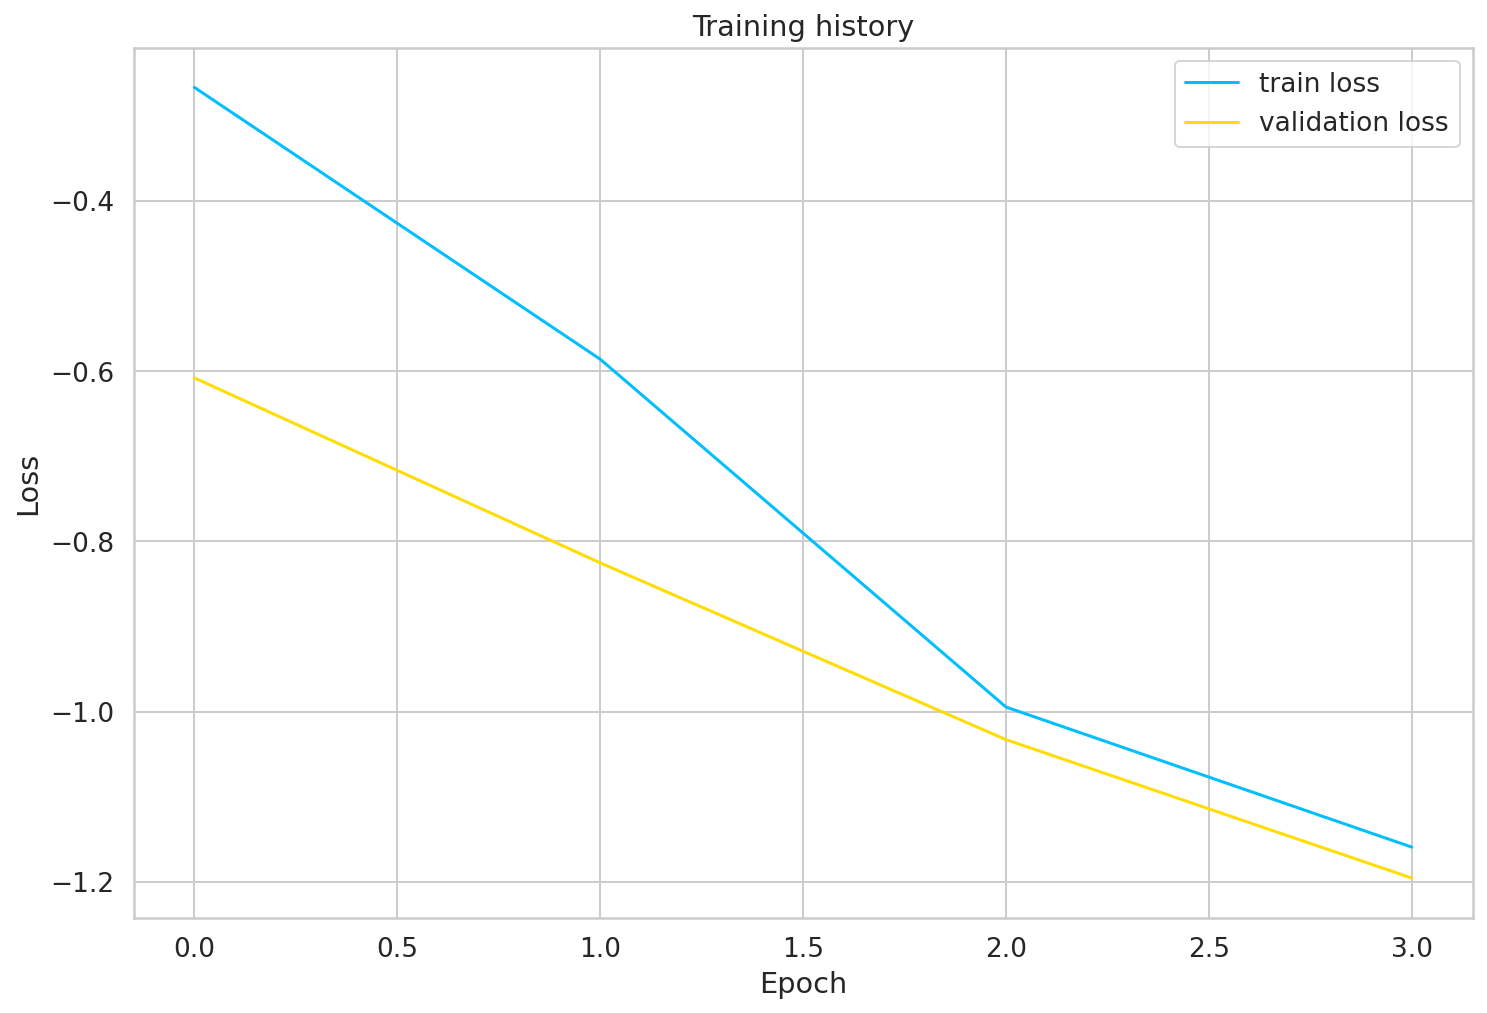

In [102]:
#Training vs Validation accuracy
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')

plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
# plt.ylim([0, 1]);

# Evaluation

In [103]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

3.7565775401069517

In [104]:
def get_predictions(model, data_loader):

    model = model.eval()

    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["review_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

    outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
    _, preds = torch.max(outputs, dim=1)

    probs = F.softmax(outputs, dim=1)

    review_texts.extend(texts)
    predictions.extend(preds)
    prediction_probs.extend(probs)
    real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    return review_texts, predictions, prediction_probs, real_values

In [105]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [106]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       1.00      0.67      0.80         6
           4       0.75      1.00      0.86         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



In [107]:
y_pred_probs

tensor([[0.0725, 0.0765, 0.0717, 0.3861, 0.3933],
        [0.0754, 0.0756, 0.0696, 0.3505, 0.4288],
        [0.0793, 0.0784, 0.0695, 0.3983, 0.3745],
        [0.0836, 0.1109, 0.0717, 0.3721, 0.3618],
        [0.0789, 0.0907, 0.0743, 0.3816, 0.3745],
        [0.0754, 0.0867, 0.0726, 0.3458, 0.4194],
        [0.0816, 0.1025, 0.0719, 0.3481, 0.3959],
        [0.0835, 0.1030, 0.0744, 0.3579, 0.3812],
        [0.0783, 0.0908, 0.0704, 0.3773, 0.3832],
        [0.0763, 0.0773, 0.0738, 0.3600, 0.4126],
        [0.0773, 0.0898, 0.0708, 0.3529, 0.4091],
        [0.1090, 0.1697, 0.0733, 0.3341, 0.3139]], grad_fn=<CopyBackwards>)

Prediction with BERT of all the data

In [108]:
BERT_predictions = get_predictions(model,all_data_loader)
#Adding GBC predictions to df
BERT_df = df
BERT_df.head(3)

,review_text,review_rating,Clean_review,LinearSVC_predict,GBC_predict,XGB_predict
0,I order 3 of them and one of the item is bad q...,3,i order of them and one of the item is bad qu...,3,3,5
1,Bulk is always the less expensive way to go fo...,4,bulk is always the less expensive way to go fo...,4,4,5
2,Well they are not Duracell but for the price i...,5,well they are not duracell but for the price i...,5,5,5


In [109]:
a = BERT_predictions.values.tolist()

AttributeError: ignored

In [ ]:
type(BERT_predictions)

In [ ]:
BERT_df['BERT_predict'] = BERT_predictions
print(f'BERT model score: {metrics.accuracy_score(y_test,BERT_predictions)}')

In [ ]:
 MAX_LEN=160
 review_text = BERT_df['review_text'].values.tolist()
 encoded_review = tokenizer.encode_plus(
   review_text,
   max_length=MAX_LEN,
   truncation=True,
   add_special_tokens=True,
   return_token_type_ids=False,
   pad_to_max_length=True,
   return_attention_mask=True,
   return_tensors='pt',
 )
 input_ids = encoded_review['input_ids'].to(device)
 attention_mask = encoded_review['attention_mask'].to(device)
 output = model(input_ids, attention_mask)
class_names = [1, 2, 3, 4, 5] 
 _, prediction = torch.max(output, dim=1)
 print(f'Review text: {review_text}')
 print(f'Sentiment  : {class_names[prediction]}') 